<a href="https://colab.research.google.com/github/meherjyothi/VIT/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MALARIAL PARASITE DETECTION USING DEEP LEARNING

In [ ]:
#!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
#!pip install --upgrade tensorflow-gpu==2.2.0 --user
#!pip uninstall tensorflow-datasets
#!pip install tensorflow-datasets==4.0.0

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,ZeroPadding2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

print(tf.__version__)

2.5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

### LOADING THE DATASET 

In [ ]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 41.27 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


The original dataset can be found on the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ , also available on kaggle.

## IMAGE PREPROCESSING

In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0,
                             validation_split=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             #rotation_angle=45,
                             shear_range=16
                             )

In [ ]:
train_data_generator = datagen.flow_from_directory(directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset', 
                                                   target_size=(img_width, img_height), 
                                                   class_mode='binary', 
                                                   batch_size = 16, 
                                                   subset = 'training',
                                                   #color_mode = 'grayscale',
                                                   interpolation = 'nearest',
                                                   shuffle=True,
                                                   seed=42
                                                   
                                                   
                                                    )

Found 22048 images belonging to 2 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                        target_size=(img_width, img_height), 
                                                        class_mode='binary',
                                                        batch_size = 16, 
                                                        subset = 'validation' ,
                                                        #color_mode = 'grayscale',
                                                        interpolation = 'nearest',
                                                        shuffle=True,
                                                        seed=42                                                       
                                                        
                                                        )

Found 5510 images belonging to 2 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
#from keras.preprocessing.image import load_img ,img_to_array
#arr_img = img_to_array(train_data_generator[0])
#plt.imshow(arr_img/255)

## CNN MODEL BUILDING

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(img_width,img_height,3) , activation = 'relu' ))  #no of filters. kernel size,..
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_data_generator, 
                              steps_per_epoch = len(train_data_generator),
                              epochs = 7,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator)                             
                              )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
1378/1378 [==============================] - 125s 90ms/step - loss: 0.5556 - accuracy: 0.7152 - val_loss: 0.3144 - val_accuracy: 0.9018
Epoch 2/7
1378/1378 [==============================] - 124s 90ms/step - loss: 0.2580 - accuracy: 0.9218 - val_loss: 0.2000 - val_accuracy: 0.9323
Epoch 3/7
1378/1378 [==============================] - 125s 90ms/step - loss: 0.2188 - accuracy: 0.9318 - val_loss: 0.1880 - val_accuracy: 0.9345
Epoch 4/7
1378/1378 [==============================] - 124s 90ms/step - loss: 0.2047 - accuracy: 0.9380 - val_loss: 0.1697 - val_accuracy: 0.9412
Epoch 5/7
1378/1378 [==============================] - 123s 89ms/step - loss: 0.1966 - accuracy: 0.9436 - val_loss: 0.1674 - val_accuracy: 0.9421
Epoch 6/7
1378/1378 [==============================] - 125s 91ms/step - loss: 0.1812 - accuracy: 0.9471 - val_loss: 0.1634 - val_accuracy: 0.9394
Epoch 7/7
1378/1378 [==============================] - 123s 89ms/step - loss: 0.1711 - accuracy: 0.9488 - val_loss: 0.1587 -

In [ ]:
history.history

{'accuracy': [0.7152122855186462,
  0.9218069911003113,
  0.9318305253982544,
  0.9380442500114441,
  0.9436230063438416,
  0.9470700025558472,
  0.9488388895988464],
 'loss': [0.5556471943855286,
  0.25803449749946594,
  0.2187868356704712,
  0.20472094416618347,
  0.1966048926115036,
  0.1812317818403244,
  0.17106372117996216],
 'val_accuracy': [0.901814877986908,
  0.9323049187660217,
  0.934482753276825,
  0.9411978125572205,
  0.942105233669281,
  0.9393829107284546,
  0.9381124973297119],
 'val_loss': [0.3144321143627167,
  0.19995617866516113,
  0.18800078332424164,
  0.16970869898796082,
  0.16744934022426605,
  0.16341115534305573,
  0.1587078720331192]}

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

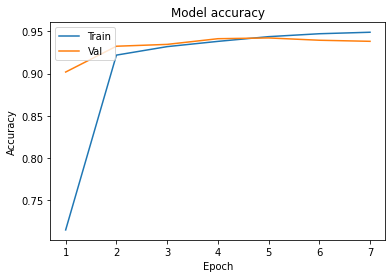

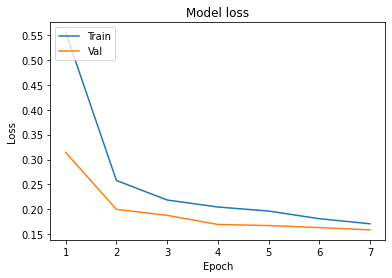

In [ ]:
plot_learningCurve(history, 7)

In [ ]:
#import pickle
#model.save('basic_cnn.h5')

In [ ]:
#basic_cnn = tf.keras.models.load_model('./basic_cnn.h5')

### TESTING

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img


In [ ]:
img1=load_img('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',target_size=(img_width,img_height))
img2=load_img('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png',target_size=(img_width,img_height))
img3=load_img('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png', target_size=(img_width,img_height))

In [ ]:
img1 = load_img('test_1.png', target_size=(img_width,img_height))
img2 = load_img('test_2.png', target_size=(img_width,img_height))

In [ ]:
x1 = img_to_array(img1)
x2 = img_to_array(img2)


In [ ]:
x1 = x1.reshape((1,) + x1.shape)
x2 = x2.reshape((1,) + x2.shape)


In [ ]:
y1 = model.predict(x1)
y2 = model.predict(x2)


The prediction for image1 is : PARASITIZED


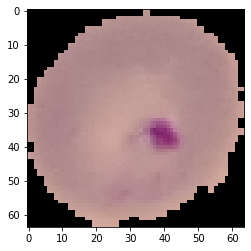

In [ ]:
plt.imshow(img1)
if y1==1:
  print('The prediction for image1 is : UNINFECTED')
if y1==0:
  print('The prediction for image1 is : PARASITIZED')

The prediction for image2 is : UNINFECTED


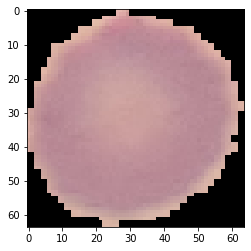

In [ ]:
plt.imshow(img2)
if y2==1:
  print('The prediction for image2 is : UNINFECTED')
if y2==0:
  print('The prediction for image2 is : PARASITIZED')